In [1]:
import torch 
from torch.utils.data import Dataset, DataLoader 
import random
import torch.autograd as autograd         
from torch import Tensor                 
import torch.nn as nn                     
import torch.nn.functional as F           
import torch.optim as optim               

import torchvision
from torchvision.utils import save_image
import torchvision.transforms as transforms  
import numpy as np  
import matplotlib.pyplot as plt        

In [19]:
from Model import *
from train import *
from test import *
from Utils import *

In [3]:
# Choose device for computation
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cuda


Load MNIST Dataset

In [4]:
data_dir = 'dataset'
train_dataset = torchvision.datasets.MNIST(data_dir, train=True, download=True)
test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)

In [5]:
# Make transformations
train_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Data in range [0,1]
train_dataset.transform = train_transform 
test_dataset.transform = test_transform

In [6]:
train_len = len(train_dataset) 
train_size = int(0.8 * train_len)
val_size = int(0.2 * train_len)

train_data, val_data = torch.utils.data.random_split(train_dataset, 
                                                     [train_size, val_size])

batch_size = 128

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Example of data after preprocessing

tensor(8)


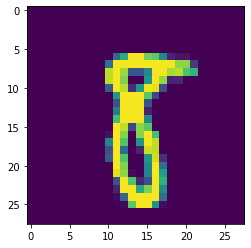

In [7]:
images, labels = iter(train_loader).next()
img = images[0][0].numpy()
print(labels[0])
plt.imshow(img)

In [8]:
# Create folder for out images
import os
folder_name = 'Images2'
os.mkdir(folder_name)

In [9]:
model = AutoEncoderClassifier(latent_space=32).to(device)

In [10]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

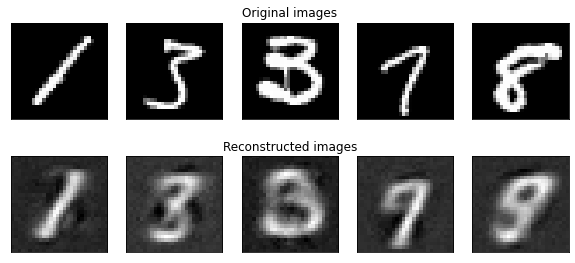

epoch [0/30], 	Training Loss:0.0498 	Validation Loss:0.0339
epoch [1/30], 	Training Loss:0.0299 	Validation Loss:0.0270
epoch [2/30], 	Training Loss:0.0256 	Validation Loss:0.0239
epoch [3/30], 	Training Loss:0.0228 	Validation Loss:0.0217
epoch [4/30], 	Training Loss:0.0209 	Validation Loss:0.0201
epoch [5/30], 	Training Loss:0.0196 	Validation Loss:0.0190
epoch [6/30], 	Training Loss:0.0186 	Validation Loss:0.0181
epoch [7/30], 	Training Loss:0.0177 	Validation Loss:0.0174
epoch [8/30], 	Training Loss:0.0170 	Validation Loss:0.0167
epoch [9/30], 	Training Loss:0.0163 	Validation Loss:0.0160


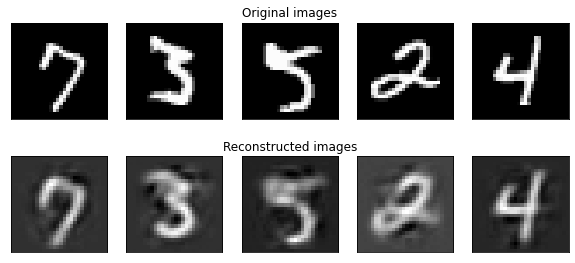

epoch [10/30], 	Training Loss:0.0158 	Validation Loss:0.0155
epoch [11/30], 	Training Loss:0.0153 	Validation Loss:0.0152
epoch [12/30], 	Training Loss:0.0149 	Validation Loss:0.0148
epoch [13/30], 	Training Loss:0.0145 	Validation Loss:0.0143
epoch [14/30], 	Training Loss:0.0141 	Validation Loss:0.0140
epoch [15/30], 	Training Loss:0.0138 	Validation Loss:0.0137
epoch [16/30], 	Training Loss:0.0135 	Validation Loss:0.0135
epoch [17/30], 	Training Loss:0.0132 	Validation Loss:0.0134
epoch [18/30], 	Training Loss:0.0130 	Validation Loss:0.0131
epoch [19/30], 	Training Loss:0.0127 	Validation Loss:0.0128


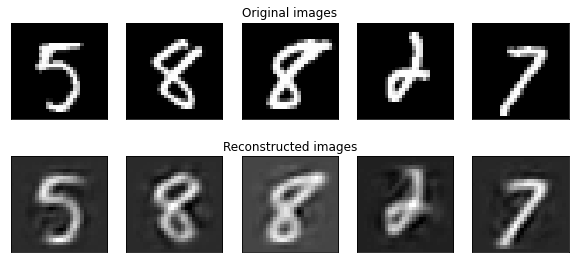

epoch [20/30], 	Training Loss:0.0125 	Validation Loss:0.0125
epoch [21/30], 	Training Loss:0.0123 	Validation Loss:0.0123
epoch [22/30], 	Training Loss:0.0121 	Validation Loss:0.0122
epoch [23/30], 	Training Loss:0.0119 	Validation Loss:0.0119
epoch [24/30], 	Training Loss:0.0117 	Validation Loss:0.0118
epoch [25/30], 	Training Loss:0.0115 	Validation Loss:0.0116
epoch [26/30], 	Training Loss:0.0114 	Validation Loss:0.0114
epoch [27/30], 	Training Loss:0.0112 	Validation Loss:0.0113
epoch [28/30], 	Training Loss:0.0111 	Validation Loss:0.0113
epoch [29/30], 	Training Loss:0.0110 	Validation Loss:0.0111


In [11]:
N_EPOCHS = 30
history={'train_loss': [],'val_loss': []}

for epoch in range(N_EPOCHS):
    train_loss = train_step_per_epoch(model, train_loader, device, criterion, optimizer)
    val_loss = test_step_per_epoch(model, valid_loader, device, criterion, epoch, folder_name, draw_images=True)
    print('epoch [{}/{}], \tTraining Loss:{:.4f} \tValidation Loss:{:.4f}'.format(epoch, N_EPOCHS, train_loss, val_loss))
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)


In [12]:
# Save weights of autoencoder
torch.save(model, './weights_ae')

In [13]:
criterion = nn.CrossEntropyLoss()
encoder_state = model.encoder.state_dict() # save AE-encoder parameters
optimizer = optim.Adam(model.clf.parameters(), lr=1e-3) #Make trick: just optimize our model with classifier parameters

In [14]:
N_EPOCHS_CLF = 15
history_clf = {'train_loss_clf': [],'val_loss_clf': []}

for epoch in range(N_EPOCHS_CLF):
    train_loss = train_clf_per_epoch(model, train_loader, device, criterion, optimizer)
    val_loss = test_clf_per_epoch(model, valid_loader, device, criterion)
    
    history_clf['train_loss_clf'].append(train_loss)
    history_clf['val_loss_clf'].append(val_loss)
    
    print('epoch [{}/{}], \tTraining Loss:{:.4f} \tValidation Loss:{:.4f}'.format(epoch + 1, N_EPOCHS_CLF, train_loss, val_loss))


epoch [1/15], 	Training Loss:0.7772 	Validation Loss:0.3640
epoch [2/15], 	Training Loss:0.3106 	Validation Loss:0.2767
epoch [3/15], 	Training Loss:0.2479 	Validation Loss:0.2360
epoch [4/15], 	Training Loss:0.2112 	Validation Loss:0.2041
epoch [5/15], 	Training Loss:0.1856 	Validation Loss:0.1878
epoch [6/15], 	Training Loss:0.1682 	Validation Loss:0.1734
epoch [7/15], 	Training Loss:0.1540 	Validation Loss:0.1643
epoch [8/15], 	Training Loss:0.1429 	Validation Loss:0.1506
epoch [9/15], 	Training Loss:0.1330 	Validation Loss:0.1447
epoch [10/15], 	Training Loss:0.1252 	Validation Loss:0.1487
epoch [11/15], 	Training Loss:0.1187 	Validation Loss:0.1311
epoch [12/15], 	Training Loss:0.1121 	Validation Loss:0.1308
epoch [13/15], 	Training Loss:0.1080 	Validation Loss:0.1242
epoch [14/15], 	Training Loss:0.1035 	Validation Loss:0.1229
epoch [15/15], 	Training Loss:0.1003 	Validation Loss:0.1178


In [16]:
torch.save(model, './weights_classifier')

In [15]:
encoder_state2 = model.encoder.state_dict()

In [17]:
# Just check that we used pre-trained encoder))
for key in encoder_state:
    print(((encoder_state[key] - encoder_state2[key]) **2).sum())

tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')


In [22]:
test_loss = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# calculate and print avg test loss
test_loss, class_correct, class_total = check_accuracy_classification(model, test_loader, device,criterion)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.102419

Test Accuracy of     0: 98% (961/980)
Test Accuracy of     1: 99% (1124/1135)
Test Accuracy of     2: 98% (1013/1032)
Test Accuracy of     3: 96% (979/1010)
Test Accuracy of     4: 97% (953/982)
Test Accuracy of     5: 95% (849/892)
Test Accuracy of     6: 97% (934/958)
Test Accuracy of     7: 96% (987/1028)
Test Accuracy of     8: 95% (931/974)
Test Accuracy of     9: 94% (953/1009)

Test Accuracy (Overall): 96% (9684/10000)
